# Longest Increasing Path in a Matrix

Given an m x n integers matrix, return the length of the longest increasing path in matrix.

From each cell, you can either move in four directions: left, right, up, or down. You may not move diagonally or move outside the boundary (i.e., wrap-around is not allowed).

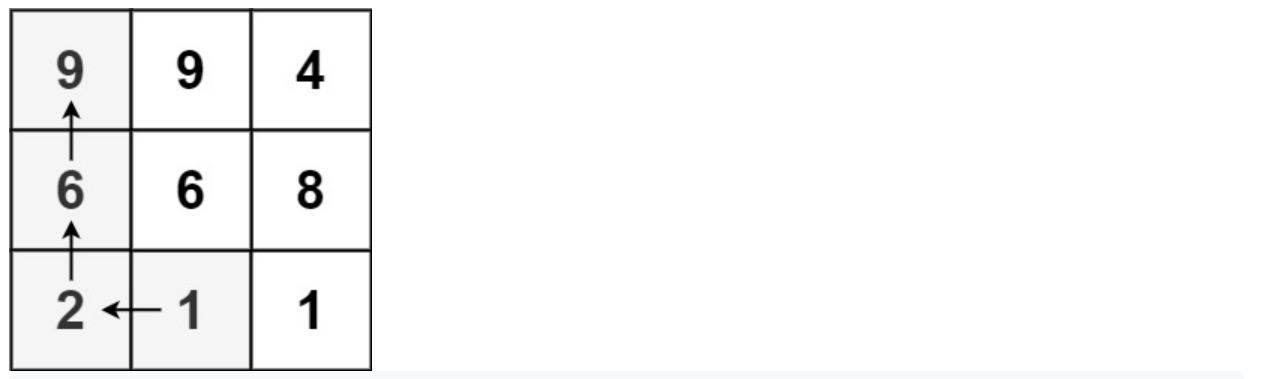

Example 1:
```
Input: matrix = [[9,9,4],[6,6,8],[2,1,1]]
Output: 4
Explanation: The longest increasing path is [1, 2, 6, 9].
```

Example 2:
```
Input: matrix = [[3,4,5],[3,2,6],[2,2,1]]
Output: 4
Explanation: The longest increasing path is [3, 4, 5, 6]. Moving diagonally is not allowed.
```

In [1]:
class Solution:

    # time = O(mn)
    # space = O(mn)
    def longestIncreasingPath(self, matrix):
        """
        :type matrix: List[List[int]]
        :rtype: int
        """
        
        self.matrix = matrix
        
        self.n = len(matrix)
        self.m = len(matrix[0])
                
        self.max_paths = [[None for _ in range(self.m)] for _ in range(self.n)]
        
        for i in range(self.n):
            for j in range(self.m):
                self.calc_maxpath(i, j)
        
        return max([maxpath for row in self.max_paths for maxpath in row])
    
                
    def calc_maxpath(self, i, j):
        # if visited
        if self.max_paths[i][j]:
            return self.max_paths[i][j]
        
        max_path = 1
        # move up, down, left, right
        for move_i, move_j in [[-1, 0], [1, 0], [0, -1], [0, 1]]:
            is_in_boundary = 0 <= i + move_i <= self.n - 1 and 0 <= j + move_j <= self.m - 1
            if not is_in_boundary:
                continue

            is_increasing_path = self.matrix[i + move_i][j + move_j] > self.matrix[i][j]
            
            if is_increasing_path:
                neighbor_path = self.calc_maxpath(i + move_i, j + move_j)
            else:
                neighbor_path = 0

            max_path = max(max_path, 1 + neighbor_path)
        
        self.max_paths[i][j] = max_path
        
        return max_path
        

In [2]:
matrix = [[9,9,4],[6,6,8],[2,1,1]]
expected = 4

output = Solution().longestIncreasingPath(matrix)
print(output)

assert output == expected

4


In [3]:
matrix = [[3,4,5],[3,2,6],[2,2,1]]
expected = 4

output = Solution().longestIncreasingPath(matrix)
print(output)

assert output == expected

4


In [4]:
matrix = [[1]]
expected = 1

output = Solution().longestIncreasingPath(matrix)
print(output)

assert output == expected


1
